In [1]:
import h5py    
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.special import logit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
filename = '/data/cephfs/punim0011/jtan/data/jets/jets_dense_h5_complete.h5'

In [2]:
# filename = '/data/cephfs/punim0011/jtan/data/jets/jets_dense_h5_complete_BB2.h5'
# filename = '/data/cephfs/punim0011/jtan/data/jets/jets_dense_h5_complete_BB3.h5'
filename = '/data/cephfs/punim0011/jtan/data/jets/jets_dense_h5_complete_BKG.h5'

In [3]:
with h5py.File(filename, "r") as f: 
    # List all groups 
    print("Keys: %s" % f.keys()) 
    data = f['data'].value
    aux = f['jet_infos'].value

Keys: <KeysViewHDF5 ['data', 'jet_infos']>


/home/jtan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.
/home/jtan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """


In [4]:
data.shape

(1000000, 14)

In [5]:
aux.shape

(1000000, 25)

In [6]:
data_cols = ['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32', 'j1-tau43', 'j1-ntrk', 
    'Mj2', 'j2-sqrt(tau21)/tau11', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'j2-ntrk']

In [7]:
jet_info = ['jet1-pt', 'jet1-eta', 'jet1-phi', 'jet1-m',
            'jet2-pt', 'jet2-eta', 'jet2-phi', 'jet2-m',
            'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz',
            'jet2-E', 'jet2-px', 'jet2-py', 'jet2-pz',
            'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
            'mjj', 'mjjj', 'met-pt', 'met-phi', 'njets']

In [8]:
len(jet_info)

25

In [9]:
df = pd.DataFrame(data, columns=data_cols)
df['deltaM'] = df['Mj1'] - df['Mj2']

# Unscaled variables
df['_Mj1-OG'] = df['Mj1']
df['_Mj2-OG'] = df['Mj2']
df['_deltaM-OG'] = df['deltaM']
df['_j1-tau21-OG'] = df['j1-tau21']
df['_j2-tau21-OG'] = df['j2-tau21']
df = df.drop(['j1-ntrk', 'j2-ntrk', 'j2-sqrt(tau21)/tau11'], axis=1)
df.head()

,label,_Mjj,Mj1,j1-sqrt(tau21)/tau11,j1-tau21,j1-tau32,j1-tau43,Mj2,j2-tau21,j2-tau32,j2-tau43,deltaM,_Mj1-OG,_Mj2-OG,_deltaM-OG,_j1-tau21-OG,_j2-tau21-OG
0,0.0,2671.516677,434.686458,1.355536,0.412576,0.358115,0.841405,96.364433,0.522396,0.777332,0.541092,338.322026,434.686458,96.364433,338.322026,0.412576,0.522396
1,0.0,2487.859678,244.277745,1.967769,0.649352,0.680178,0.816667,172.107404,0.476319,0.673678,0.839833,72.170341,244.277745,172.107404,72.170341,0.649352,0.476319
2,0.0,2701.419203,271.169856,2.428236,0.280751,0.911130,0.832179,214.736187,0.591027,0.823075,0.888883,56.433670,271.169856,214.736187,56.433670,0.280751,0.591027
3,0.0,3567.000562,798.908253,1.236549,0.332671,0.761590,0.849087,151.030182,0.437222,0.814020,0.764017,647.878071,798.908253,151.030182,647.878071,0.332671,0.437222
4,0.0,2313.429588,144.917514,2.108889,0.499265,0.676914,0.643039,129.006484,0.592469,0.765230,0.927964,15.911030,144.917514,129.006484,15.911030,0.499265,0.592469


In [10]:
df_aux = pd.DataFrame(aux, columns=jet_info)
df_aux = df_aux.drop(['mjj','njets','jet1-m', 'jet2-m'], axis=1)
df = pd.concat([df, df_aux], axis=1)
df['_Mjjj'] = df['mjjj']

features = df.columns[2:]

In [11]:
# Drop outliers?
df = df[(np.abs(stats.zscore(df[features])) < 6).all(axis=1)].reset_index(drop=True)

In [12]:
df_sig = df[df.label > 0.5]
df_bkg = df[df.label < 0.5]

In [13]:
def compare_sb(df_sig, df_bkg, var, logscale=False, kde=True):
    sns.distplot(df_sig[var], label='sig', kde=kde)
    sns.distplot(df_bkg[var], label='bkg', kde=kde)
    plt.legend()
    if logscale is True:
        plt.yscale('log')
    plt.xlabel(var.replace('_',''))
    plt.show()

/home/jtan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/jtan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jtan/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


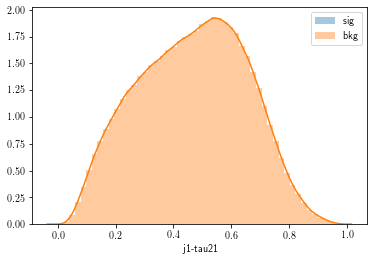

In [13]:
compare_sb(df_sig, df_bkg, 'j1-tau21')

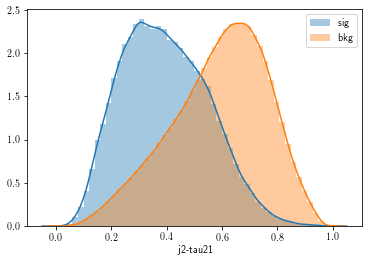

In [14]:
compare_sb(df_sig, df_bkg, 'j2-tau21')

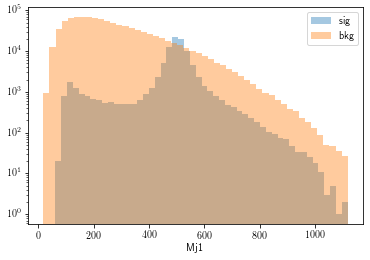

In [15]:
compare_sb(df_sig, df_bkg, 'Mj1', logscale=True, kde=False)

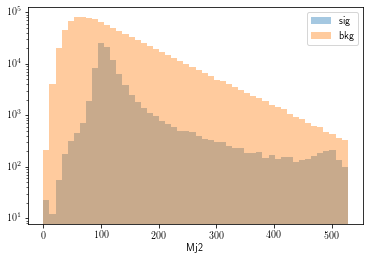

In [16]:
compare_sb(df_sig, df_bkg, 'Mj2', logscale=True, kde=False)

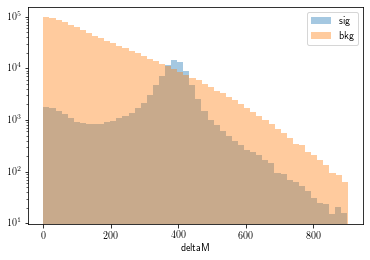

In [17]:
compare_sb(df_sig, df_bkg, 'deltaM', logscale=True, kde=False)

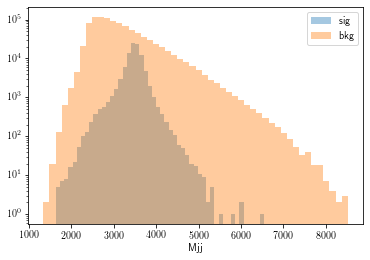

In [18]:
compare_sb(df_sig, df_bkg, '_Mjj', logscale=True, kde=False)

/home/jtan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/jtan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


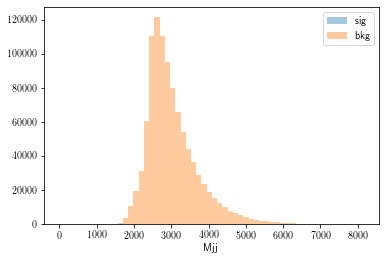

In [16]:
compare_sb(df_sig, df_bkg, '_Mjj', logscale=False, kde=False)

/home/jtan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/jtan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


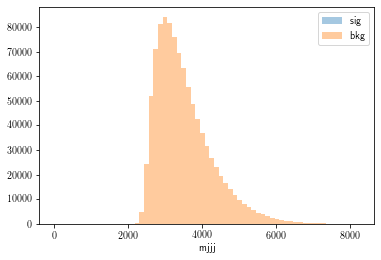

In [17]:
compare_sb(df_sig, df_bkg, 'mjjj', logscale=False, kde=False)

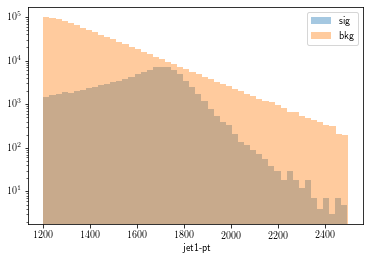

In [19]:
compare_sb(df_sig, df_bkg, 'jet1-pt', logscale=True, kde=False)

### Inject Signal

In [20]:
# Subsample signal events 
N_SIG = 1000
df_sig = df_sig.sample(n=N_SIG)
df = pd.concat([df_sig, df_bkg]).sample(frac=1).reset_index(drop=True)

In [15]:
df_train, df_eval = train_test_split(df, test_size=0.2)
df_test, df_val = train_test_split(df_eval, test_size=0.25)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
df_train, df_eval = train_test_split(df, test_size=0.5)
df_test, df_val = train_test_split(df_eval, test_size=0.05)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
cd ~/gpu/jtan/data/jets/sig1k_fair/

/data/cephfs/punim0011/jtan/data/jets/sig1k_fair


In [23]:
df_train.to_hdf('jets_all_train.h5', key='df')
df_test.to_hdf('jets_all_test.h5', key='df')
df_val.to_hdf('jets_all_val.h5', key='df')

#### For boxes with no signal information

In [18]:
cd /home/jtan/gpu/jtan/data/jets/black_boxes

/data/gpfs/projects/punim0011/jtan/data/jets/black_boxes


In [19]:
df_train, df_val = train_test_split(df, test_size=0.05)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [20]:
df_train.to_hdf('jets_bkg_train.h5', key='df')
df_val.to_hdf('jets_bkg_val.h5', key='df')

### Signal region, sidebands

In [29]:
def get_signal_region(df, SR_interval=(3.3,3.7)):
    # SR_interval defined in TeV, convert to GeV
    SR_check = lambda x: (x >= SR_interval[0]*1e3) and (x <= SR_interval[1]*1e3)
    in_SR = df._Mjj.apply(SR_check)
    df_SR, df_SB = df[in_SR], df[~in_SR]
    return df_SR, df_SB

In [45]:
df_train_SR, df_train_SB = get_signal_region(df_train)
df_eval_SR, df_eval_SB = get_signal_region(df_eval)

In [46]:
cd ~/gpu/jtan/data/jets/sig10k/

/data/cephfs/punim0011/jtan/data/jets/sig10k


In [35]:
df_sig_SR = df_train_SR[df_train_SR.label > 0.5]
df_bkg_SR = df_train_SR[df_train_SR.label < 0.5]

In [39]:
def compare_distributions(bkg, sig, logscale=False, fname='generic_compare.pdf'):   
    plt.figure(figsize=(10,6))
    plt.tick_params(axis='both', which='major', labelsize=16)
    sea_green = '#54ff9f'
    steel_blue = '#4e6bbd'
    crimson_tide = '#e50005'
    yellow = 'xkcd:crimson'
    orange = '#ffa500'
    nbins=42
    sns.distplot(bkg, color=steel_blue,hist=True, kde=False, label='Background', bins=nbins, hist_kws=dict(edgecolor="0.85", linewidth=0.5, alpha=0.65))
    sns.distplot(sig, color=sea_green,hist=True, kde=False, label='Signal', bins=nbins, hist_kws=dict(edgecolor="0.85", linewidth=0.5, alpha=0.65))
    
    if logscale is True:
        plt.yscale('log')
    plt.legend(fontsize=14)
    plt.xlabel(r'$M_{JJ}$ (GeV)', fontsize=20)
    plt.ylabel(r'Counts', fontsize=20)
    plt.savefig(os.path.join('imgs',fname), bbox_inches='tight', format='pdf', dpi=128)

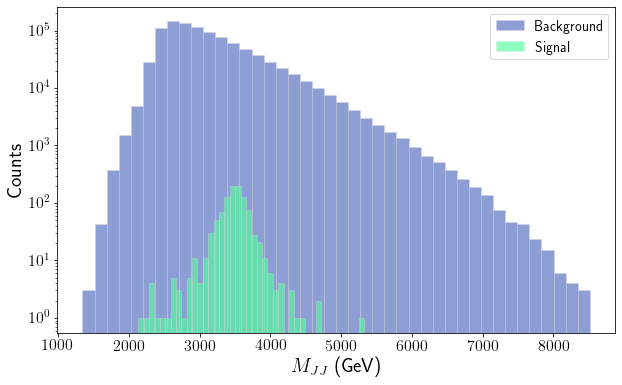

In [47]:
compare_distributions(df_bkg._Mjj, df_sig._Mjj, logscale=True, fname='mass_spectrum.pdf')

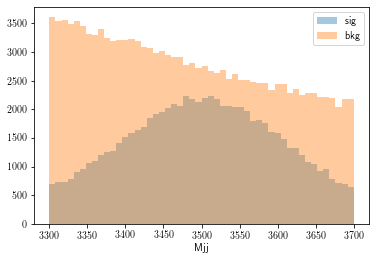

In [37]:
compare_sb(df_sig_SR, df_bkg_SR, '_Mjj', logscale=False, kde=False)

In [38]:
df_sig_SB = df_train_SB[df_train_SB.label > 0.5]
df_bkg_SB = df_train_SB[df_train_SB.label < 0.5]

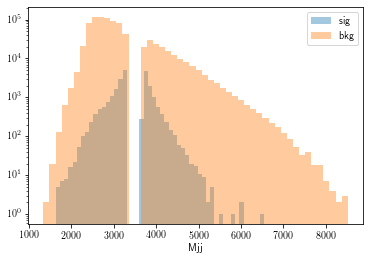

In [40]:
compare_sb(df_sig_SB, df_bkg_SB, '_Mjj', logscale=True, kde=False)

### Optional Scaling

In [22]:
logit_transform = True

def scale_dataset(df, scaler=None, logit_transform=False):

    df_protected = df[['label', 'Mjj']+[col for col in df.columns if 'OG' in col]]
    df_unprotected = df.drop(df_protected.columns, axis=1)

    if logit_transform is True:
        EPS = 0.01
        if scaler is None:
            scaler = MinMaxScaler((0+EPS,1-EPS))
            df_unprotected = pd.DataFrame(logit(scaler.fit_transform(df_unprotected)), columns=df_unprotected.columns)
        else:
            df_unprotected = pd.DataFrame(logit(scaler.transform(df_unprotected)), columns=df_unprotected.columns)
    else:
        if scaler is None:
            scaler = MinMaxScaler((-1,1))
            df_unprotected = pd.DataFrame(scaler.fit_transform(df_unprotected), columns=df_unprotected.columns)
        else:
            df_unprotected = pd.DataFrame(scaler.transform(df_unprotected), columns=df_unprotected.columns)

    df_scaled = pd.concat([df_protected, df_unprotected], axis=1)
    df_scaled = df_scaled.dropna()
    
    return df_scaled, scaler

In [36]:
df_train_scaled, scaler = scale_dataset(df_train, logit_transform=True)

In [37]:
df_test_scaled, scaler = scale_dataset(df_test, scaler=scaler, logit_transform=True)

In [38]:
df_test_scaled.head()

,label,Mjj,Mj1-OG,Mj2-OG,deltaM-OG,j1-tau21-OG,j2-tau21-OG,Mj1,j1-sqrt(tau21)/tau11,j1-tau21,...,jet2-E,jet2-px,jet2-py,jet2-pz,jet3-pt,jet3-eta,jet3-phi,jet3-m,met-pt,met-phi
0,0.0,4699.057712,496.860748,458.509458,38.351289,0.349043,0.215593,-0.254205,-2.699245,-0.625507,...,1.747140,-1.943879,0.323907,1.974408,-2.676021,-0.519409,-0.811192,-2.108622,-2.773875,-1.987787
1,0.0,3574.329255,103.107931,42.411955,60.695976,0.520036,0.407390,-2.366326,-0.834489,0.079883,...,-0.620208,-0.993021,0.368435,0.633268,-2.189941,-0.958458,2.411738,-2.466128,-1.473622,3.590648
2,0.0,3618.026205,515.656361,121.368081,394.288280,0.637483,0.482969,-0.186361,-2.552123,0.565431,...,-0.820952,1.407499,0.283921,0.210255,0.302355,0.519721,-3.456225,-1.394405,-0.939559,-2.958779
3,0.0,2650.222580,91.918760,52.752228,39.166532,0.800542,0.183935,-2.500798,-1.241998,1.393710,...,-0.695014,-0.091821,-1.113602,-0.557384,-1.740938,-0.900378,0.899918,-2.243203,-0.799643,0.837080
4,0.0,4138.112845,209.222112,60.569812,148.652299,0.658777,0.724407,-1.513825,-1.057624,0.659094,...,-0.618018,1.307828,-0.179785,-0.489638,-1.779360,0.828131,-4.453081,-2.022179,-1.743128,-3.703994


In [27]:
df_train_scaled.to_hdf('jets_medium_logit_train.h5', key='df')
df_test_scaled.to_hdf('jets_medium_logit_test.h5', key='df')

## Plots

In [29]:
df_scaled_sig = df_test_scaled[df_test_scaled.label > 0.5]
df_scaled_bkg = df_test_scaled[df_test_scaled.label < 0.5]

In [39]:
df_scaled_sig = df_train_scaled[df_train_scaled.label > 0.5]
df_scaled_bkg = df_train_scaled[df_train_scaled.label < 0.5]

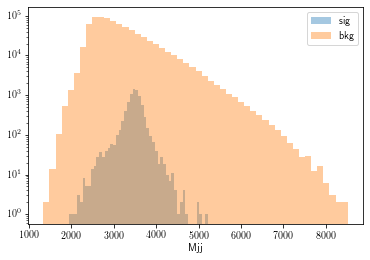

In [41]:
compare_sb(df_scaled_sig, df_scaled_bkg, 'Mjj', logscale=True, kde=False)

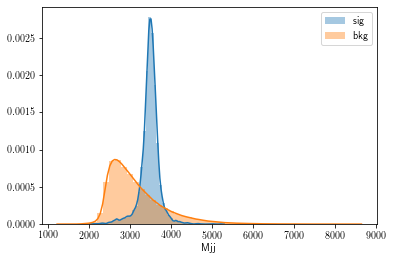

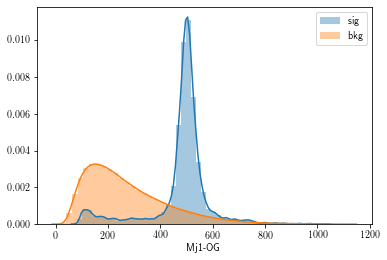

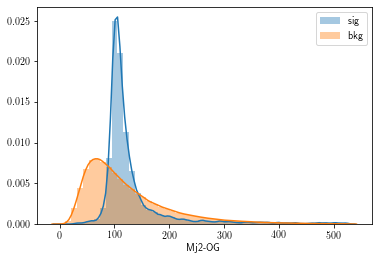

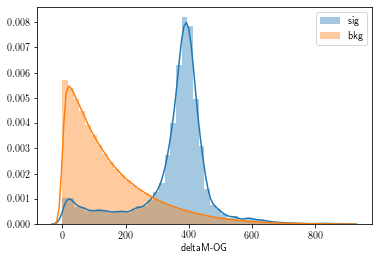

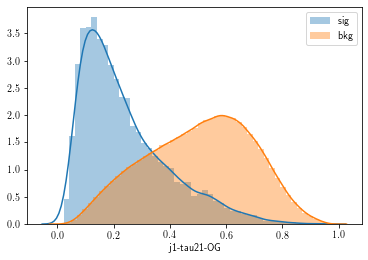

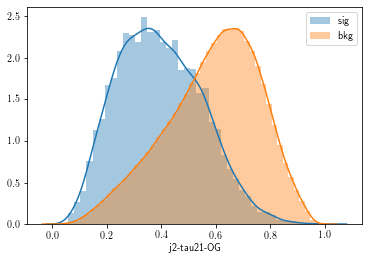

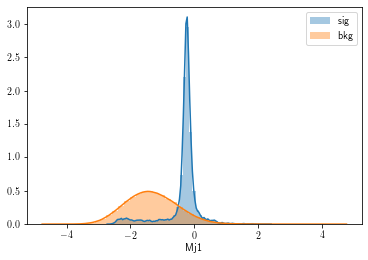

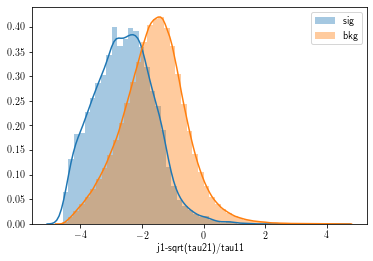

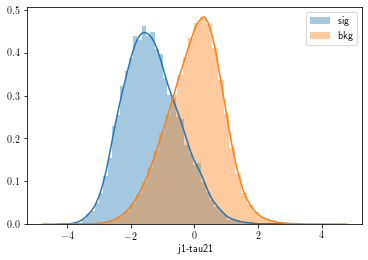

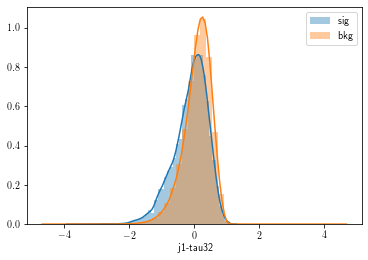

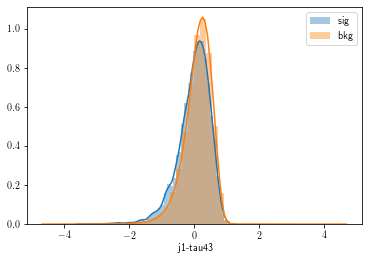

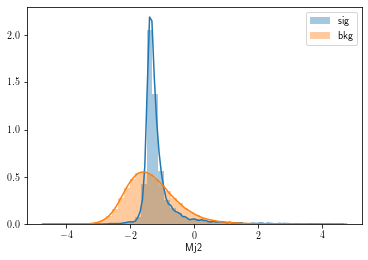

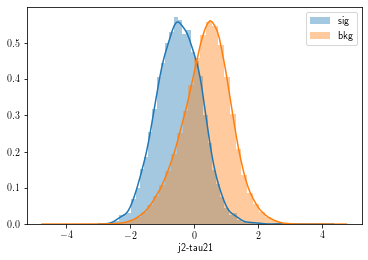

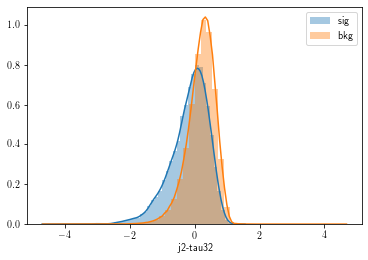

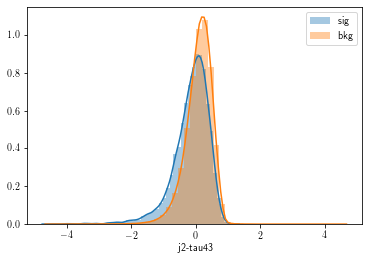

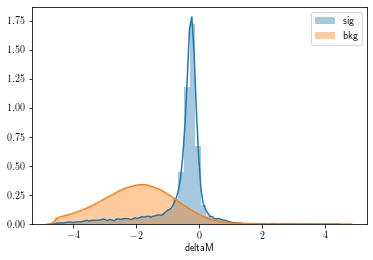

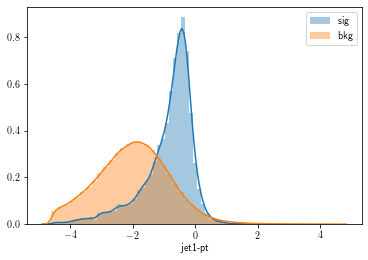

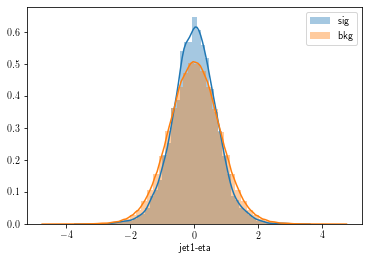

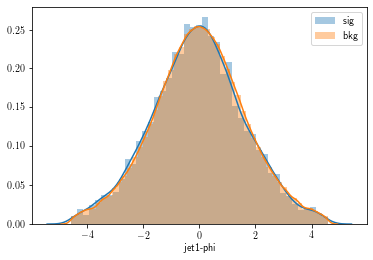

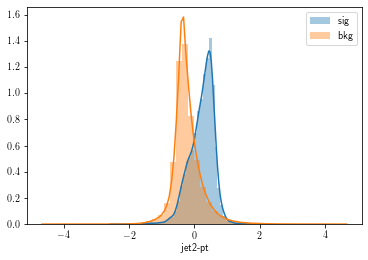

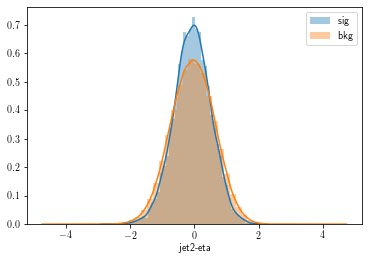

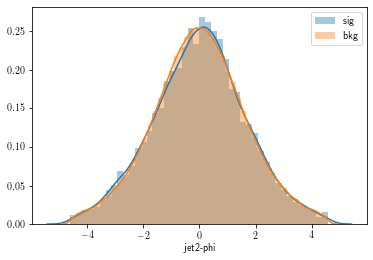

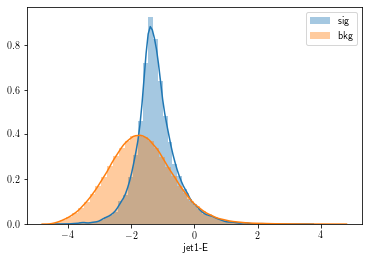

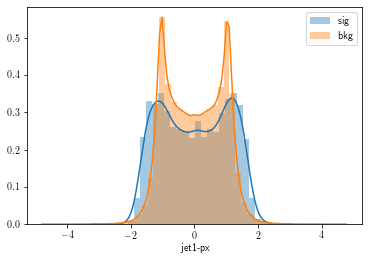

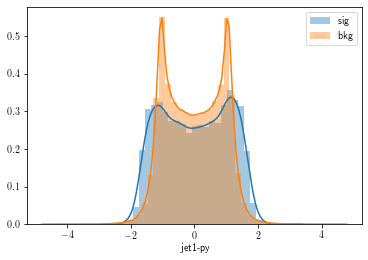

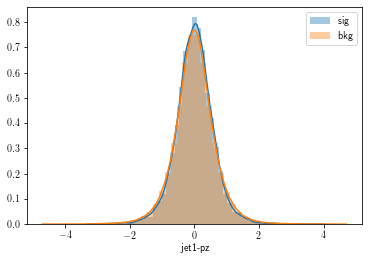

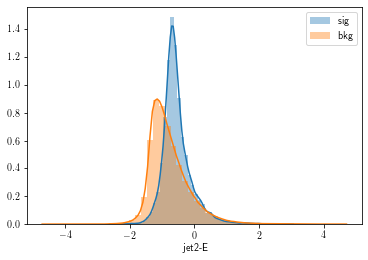

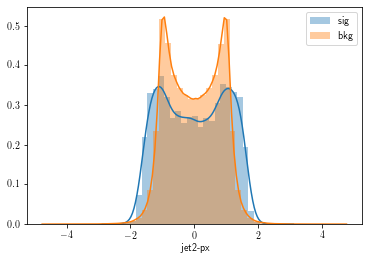

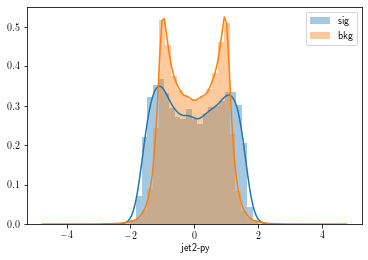

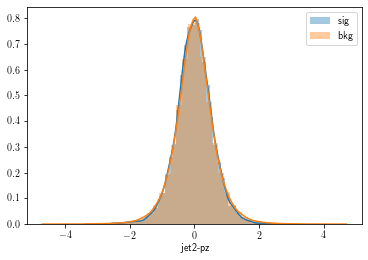

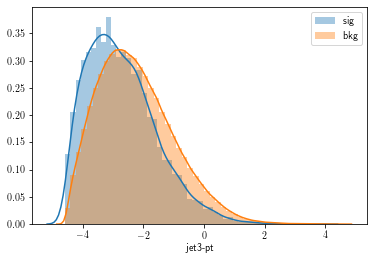

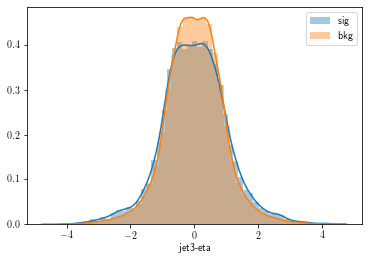

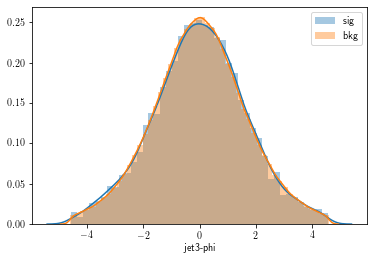

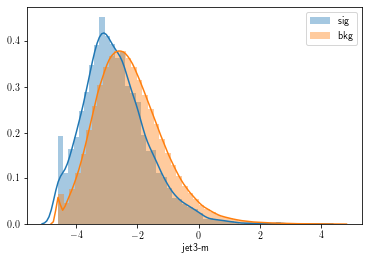

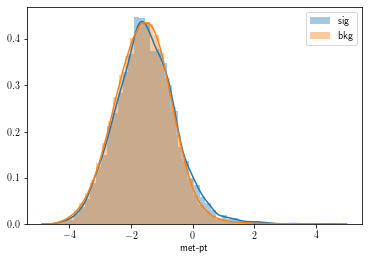

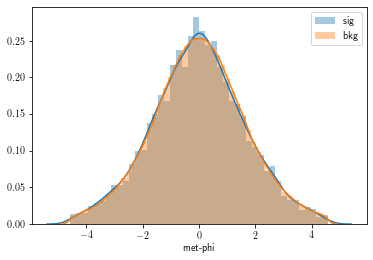

In [40]:
for col in df_scaled_sig.columns[1:]:
    compare_sb(df_scaled_sig, df_scaled_bkg, col)

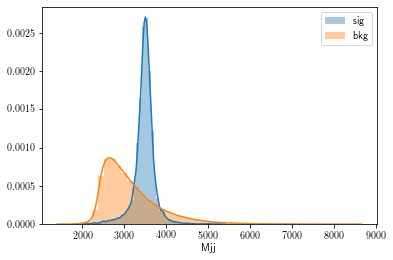

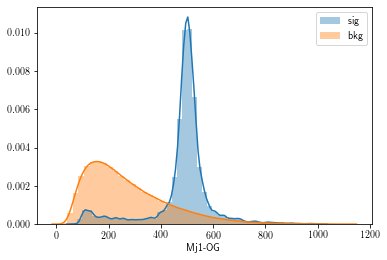

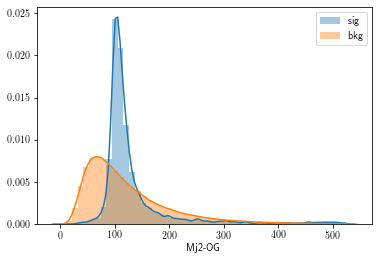

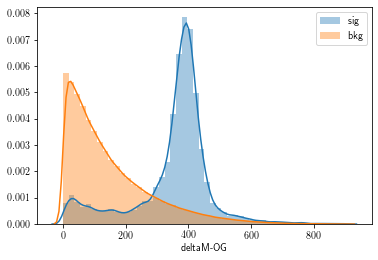

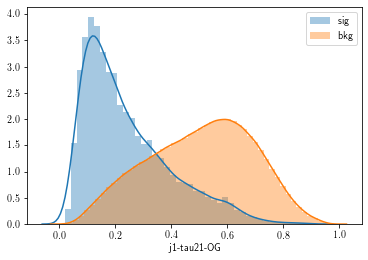

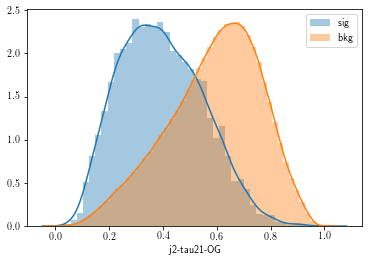

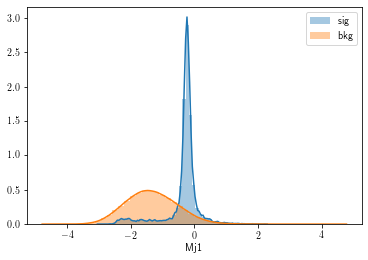

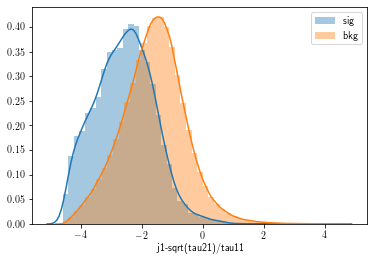

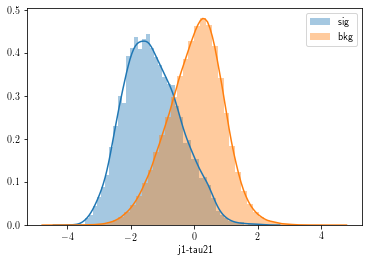

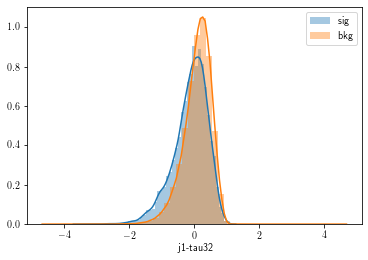

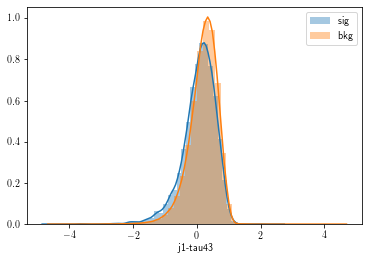

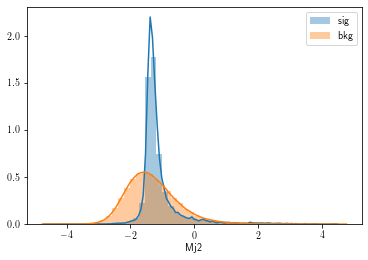

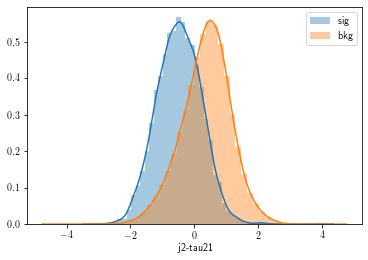

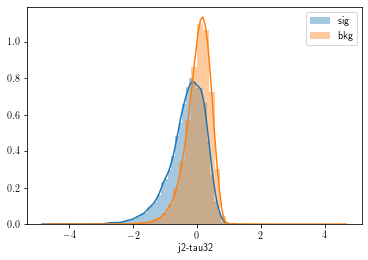

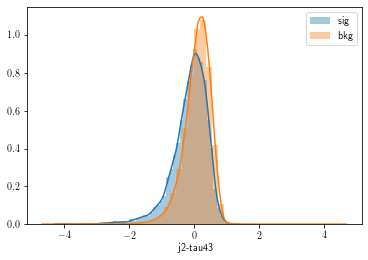

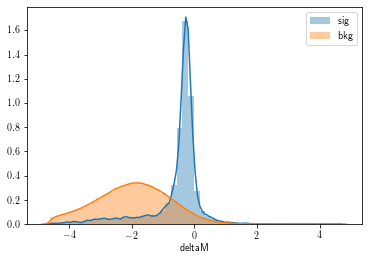

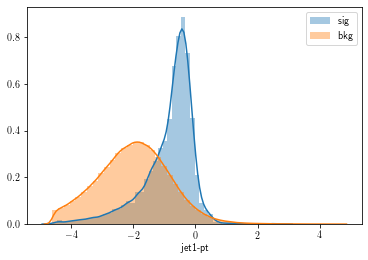

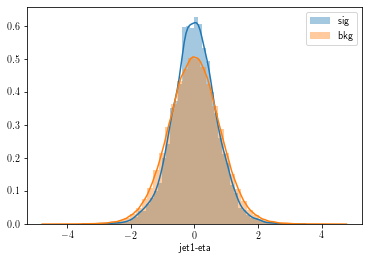

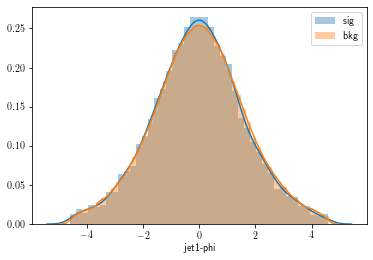

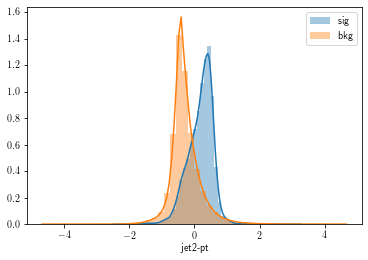

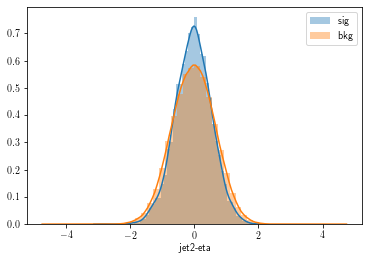

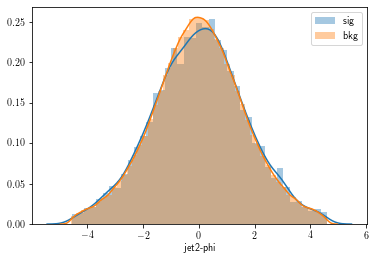

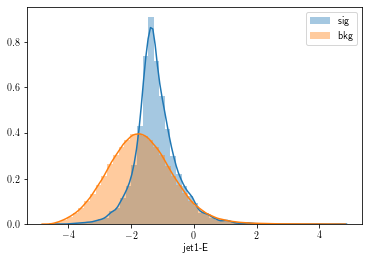

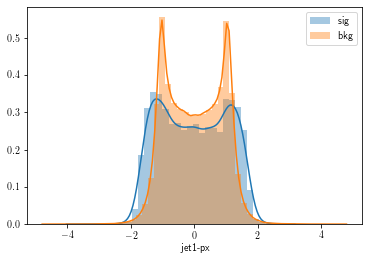

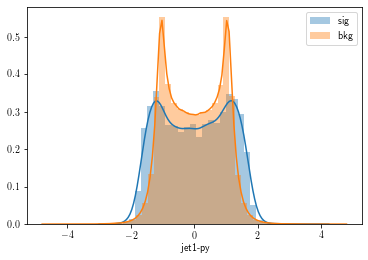

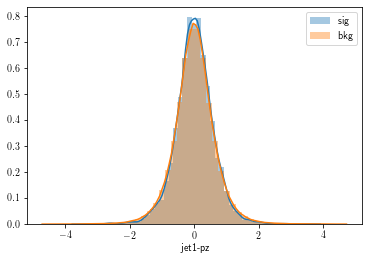

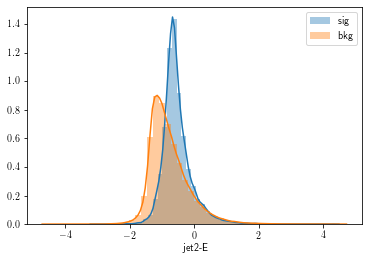

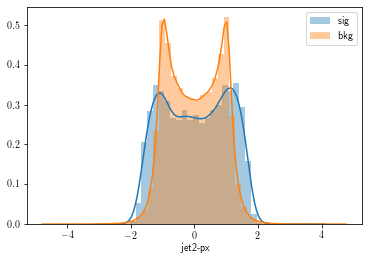

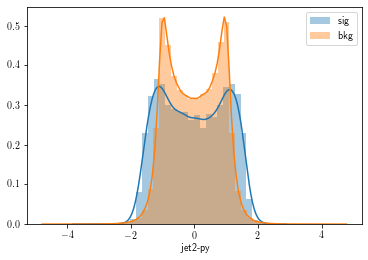

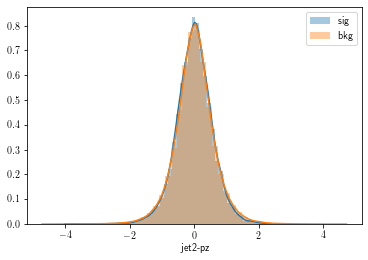

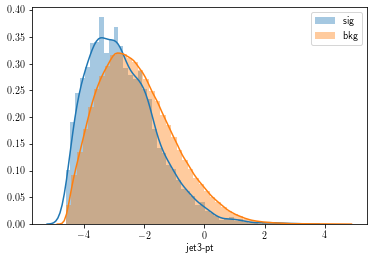

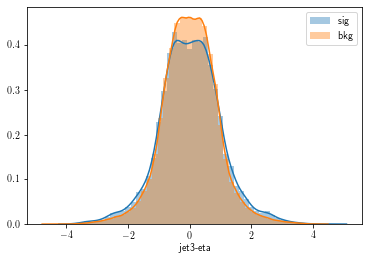

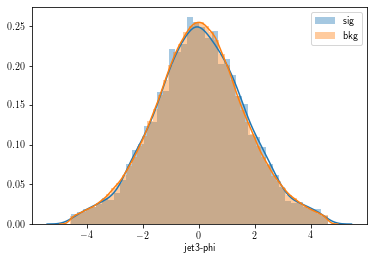

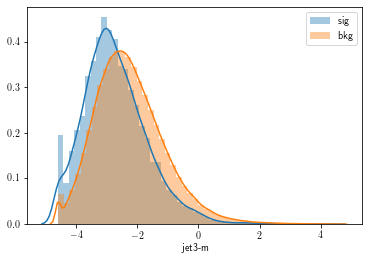

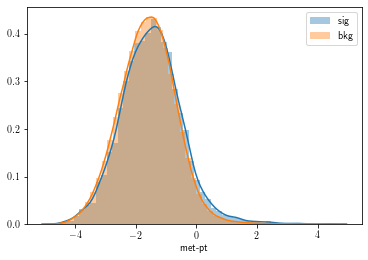

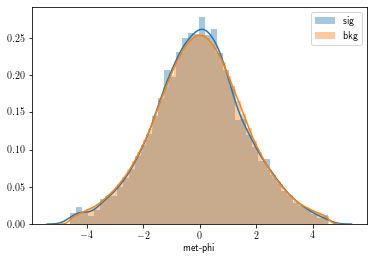

In [31]:
for col in df_scaled_sig.columns[1:]:
    compare_sb(df_scaled_sig, df_scaled_bkg, col)